## Part 5: Metrics

In order to check the performance of our model on the test set we need to measure it.

Read about recall and precision in the first section of the following link: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Load the results file from the previous part:

In [3]:
import pandas as pd

In [4]:
#Load results
results = pd.read_csv("results.csv")

<div style="font-size: 20px;color:red;background:#D3D3D3"> &#187; Coding Task! </div> 

Calculate the recall and precision of your model:
* Notice there are multiple ways to calculate recall and precision on multiclass data. You can either average the recall and precision over all the cell types, or you can calculate the metrics for each cell type separately. <br> For this step in the tutorial, calculate the recall and precision over each cell type separately.

In [11]:
from sklearn.metrics import recall_score, precision_score
# >> Print here the recall & precision
cell_types = results['gts'].unique()
gts_total = results['gts'].tolist()
preds_total = results['preds'].tolist()
recall_per_class = recall_score(gts_total, preds_total, average=None,zero_division=1)
precision_per_class = precision_score(gts_total, preds_total, average=None,zero_division=1)

for i, cell_type in enumerate(cell_types):
    print(f"Cell Type: {cell_type}")
    print(f"  Recall: {recall_per_class[i]:.2f}")
    print(f"  Precision: {precision_per_class[i]:.2f}")

Cell Type: 14
  Recall: 0.86
  Precision: 0.89
Cell Type: 1
  Recall: 0.62
  Precision: 0.62
Cell Type: 8
  Recall: 0.44
  Precision: 0.75
Cell Type: 13
  Recall: 0.73
  Precision: 0.78
Cell Type: 11
  Recall: 0.79
  Precision: 0.27
Cell Type: 0
  Recall: 0.90
  Precision: 0.43
Cell Type: 4
  Recall: 0.83
  Precision: 0.81
Cell Type: 15
  Recall: 0.00
  Precision: 1.00
Cell Type: 9
  Recall: 0.69
  Precision: 0.76
Cell Type: 6
  Recall: 0.62
  Precision: 0.73
Cell Type: 3
  Recall: 0.64
  Precision: 0.37
Cell Type: 12
  Recall: 0.92
  Precision: 0.71
Cell Type: 2
  Recall: 0.29
  Precision: 0.10
Cell Type: 10
  Recall: 0.87
  Precision: 0.95
Cell Type: 5
  Recall: 0.88
  Precision: 0.63
Cell Type: 7
  Recall: 0.55
  Precision: 0.52


<div style="font-size: 20px;color:green;background:#D3D3D3"> &#187; Checking for understanding, Answer the following: </div> 

- What would be the meaning of 90% recall on cell type 1?
- What would be the meaning of 90% precision on cell type 1?
- Would you expect to get similar recall/precision on every cell type? Why?

<div style="font-size: 20px;color:red;background:#D3D3D3"> &#187; Coding Task! </div> 

Calculate the Confusion matrix of your model:
* Confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

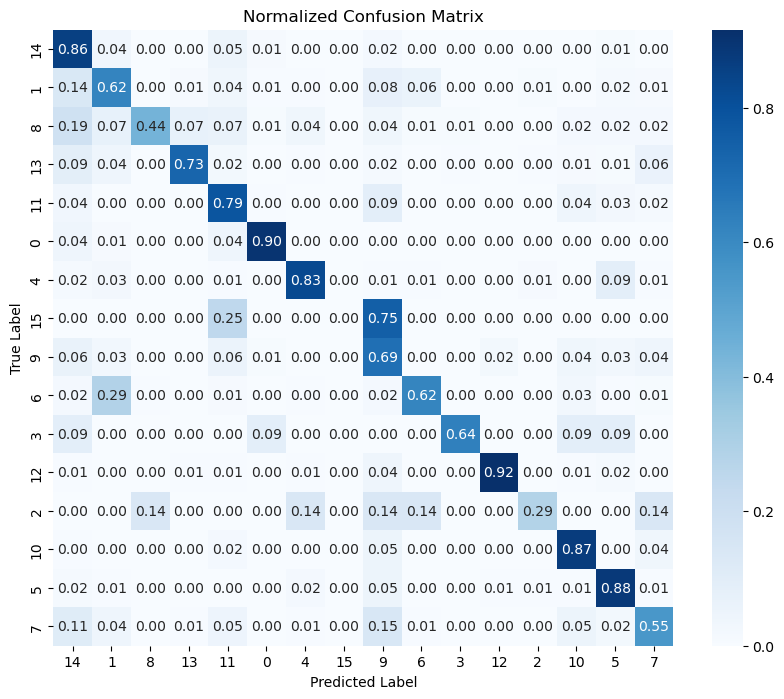

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# >> Plot here the confusion matrix normalized by the rows (->GT)
cm = confusion_matrix(gts_total, preds_total)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by rows (GT)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=cell_types, yticklabels=cell_types)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<div style="font-size: 20px;color:green;background:#D3D3D3"> &#187; Checking for understanding, Answer the following: </div> 

Can you explain why some classes are doing better than others? <br>
How do you think balancing the data affects the results? <br>
Talk with the tutor about it.

### Part 6: Augmentations

Balancing the data alone may not suffice because it will result in the network seeing the same identical cells multiple times.
<br>
To enhance the diversity of the data, you can make minor changes to the input images during each iteration of the training process. This way the same cell will look a little bit different each time the model see it.
<br> For example, randomly flip or rotate the image before forwarding it thorugh the model. 
<br><b> However, two important rules you should remember are: </b>
<br>&ensp;&ensp; * The augmentation should keep the image in the same distribution of the data. For example in our dataset you can rotate the images but you cant shuffle the order of the channels.
<br>&ensp;&ensp; * The augmentation must not impact the GT, for example in this task augmentation that move the input image too much will change the cell in focus and by that the GT won't be relevant anymore. 
<br>Common augmentations are: flips, rotations and more. Some of the common augmentations won't fit this data (for example ColorJitter) but there are other creative augmentations you can defined <b>yourself</b> which will be specific to your own data. For instance, we can shift each channel <i>slightly</i> in a different direction. Try to think about more augmentations you can apply to this dataset and implement them.
<br>A good library for augmentaion is <a href="https://pytorch.org/vision/stable/transforms.html">torchvision</a>.
<br> The follow <a href="https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py"> link contains some visual explanation on augmentations </a>

<div style="font-size: 20px;color:red;background:#D3D3D3"> &#187; Coding Task! </div> 
Add augmentation to the list of augmentations.
Add at least one new and original augmentation (Not an existing augmentation from pytorch) that fits this dataset.

In [10]:
from torchvision import transforms

class RandomRotation:
    def __init__(self, max_degrees):
        self.max_degrees = max_degrees

    def __call__(self, img):
        angle = random.uniform(-self.max_degrees, self.max_degrees)
        img_rotated = transforms.functional.rotate(img, angle, fill=0)  # Fill with zeros
        return img_rotated
    
    
augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomRotation(10),
    ## Fill here more augmentation
    RandomRotation(max_degrees=10),
])

<i> Keep in mind that some augmentations will introduce zero padding to the image (for example the rotation augmentation), as a bonus you can try to solve this issue! </i>

<div style="font-size: 20px;color:red;background:#D3D3D3"> &#187; Coding and Thinkinh Tasks! </div> 

Follow the instrctions below:
<br>
1. Go back to parts 3-4, add the augmentations to the training loop and try to train for a few epochs epoch (appoximetly 10 minutes) with and without augmentations.
2. Compare the results. Did the augmentation improved the confusion matrix?
3. Were all the cell types effected the same from the augmentations?
4. Put all your results in one PowerPoint and share your conclusions with your tutor.

### Part 7: Using the cell's segmentation

<div style="font-size: 20px;color:green;background:#D3D3D3"> &#187; Answer the following: </div> 

In the previous sections we gave the model the protein channels and the masking of the cell of interest as extra information that's relevent to the task of cell classification.
The mask essentialy mark the pixels in the image that belong to the cell we are interseted, we also have the mask of all the cells in the image.

There are multiple ways to incorporate the mask in the network we've build. 
Suggest at least two ways to use the mask's information. Talk about it with your tutor. (No need to implement)